<a href="https://colab.research.google.com/github/ghostpasha01/Veri_Bilimi_projelerim/blob/main/Marketing_Campaign_Analysis_(Pazarlama_Kampanya_Analizi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective:
Kontrol ve deney grupları arasında ve ayrıca farklı yaş grupları arasında farklı pazarlama kanallarındaki 
kampanyaların performansını kontrol etmek ve kanalların yüksek veya düşük performansının nedenlerini araştırmak.

# Methodolgy:
Analizimde, performansı ölçmek ve içgörüler elde etmek için kanallar, yaş grupları, kontrol/deney grubu ve haftanın günleri arasında dönüşüm oranlarını hesapladım ve çizdim. Ve bundan sonra, çıkarımları/içgörüleri doğrulamak için A/B testi yaptık.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("C:\\Users\\Hp\\Desktop\\marketing.csv")
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


# Veri Temizleme:
Tek tek sütunları analiz etme ve veri türlerini düzeltme

In [ ]:
id_len=df['user_id'].apply(lambda x:len(x))
id_len.unique()

array([10,  9], dtype=int64)

In [ ]:
df['user_id'].astype(str).str[0].unique()

array(['a'], dtype=object)

In [ ]:
#Date Served
df['date_served'].tail()

10032    1/17/18
10033    1/17/18
10034     1/5/18
10035    1/17/18
10036     1/6/18
Name: date_served, dtype: object

In [ ]:
df['date_served']=pd.to_datetime(df['date_served'])
df['date_served'].tail()

10032   2018-01-17
10033   2018-01-17
10034   2018-01-05
10035   2018-01-17
10036   2018-01-06
Name: date_served, dtype: datetime64[ns]

In [ ]:
#Converted and Is_retained
df['converted']=df['converted'].replace(to_replace=["True","False"],value=[1,0]).astype('float64')
df['is_retained']=df['is_retained'].replace(to_replace=["True","False"],value=[1,0]).astype('float64')
#boş değerler nedeniyle int'ye dönüştürülemedi

# Age Group

In [ ]:
df["age_group"].value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [ ]:
df['age_group']=df['age_group'].str.replace("years","")
df['age_group'].value_counts()

19-24     1682
24-30     1568
0-18      1539
30-36     1355
36-45     1353
45-55     1353
55+       1187
Name: age_group, dtype: int64

# date_subscribed and date_canceled

In [ ]:
df['date_subscribed']=pd.to_datetime(df['date_subscribed'])
df['date_canceled']=pd.to_datetime(df['date_canceled'])

In [ ]:
#gelecekte analiz için abonelik için haftanın günü oluşturma
df['DOW_subscribed']=df['date_subscribed'].dt.dayofweek
df['DOW_subscribed'].value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: DOW_subscribed, dtype: int64

In [ ]:
weekday_dict={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}


In [ ]:
df['DOW_subscribed'] = df['DOW_subscribed'].map(weekday_dict)
df['DOW_subscribed'].value_counts()


Tues    386
Wed     352
Mon     306
Thu     226
Fri     199
Sun     196
Sat     191
Name: DOW_subscribed, dtype: int64

# Marketing Channel

In [ ]:
df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

# Variant

In [ ]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

# Language

In [ ]:
df['language_displayed'].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [ ]:
df['language_preferred'].value_counts()

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [ ]:
#Görüntülenen dilin tercih edilen dil ile aynı olup olmadığı kontrol ediliyor
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not corret for {} observations".format(df['is_language_correct'].count()-df['is_language_correct'].sum()))

Language is not corret for 522 observations


# Veri temizliği yapılır, temizlenen veriler gözden geçirilir

In [ ]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  DOW_subscribed       1856 non-null   object        
 13  is_language_correct  10037 non-

# Keşifsel Veri Analizi

# Kanala Göre Günlük Pazarlama Erişimi

In [ ]:
print('Unique total users: {}'.format(df['user_id'].nunique()))
print("Unique users converted: {}".format(df.loc[df['converted']==1,'user_id'].nunique()))

Unique total users: 7309
Unique users converted: 1015


# Marketing Channel Analysis


In [ ]:
channel_count=df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


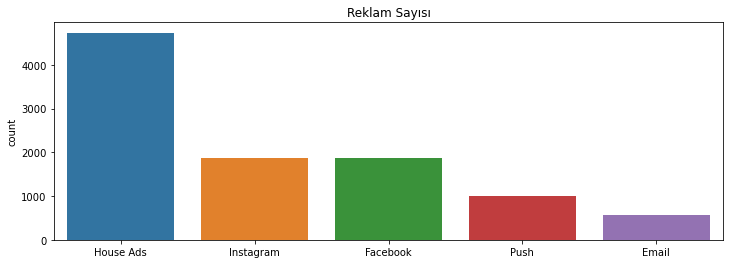

In [ ]:
plt.figure(figsize=(12,4))
ax=sns.countplot(df['marketing_channel'],order=channel_count.index)
plt.xlabel("")
plt.title("Reklam Sayısı",fontsize=12);

In [ ]:
#reklam sayısını kanala göre döndürme
daily_ads_count=df.pivot_table(values="user_id",index="date_served",columns="marketing_channel",aggfunc=len)
daily_ads_count.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


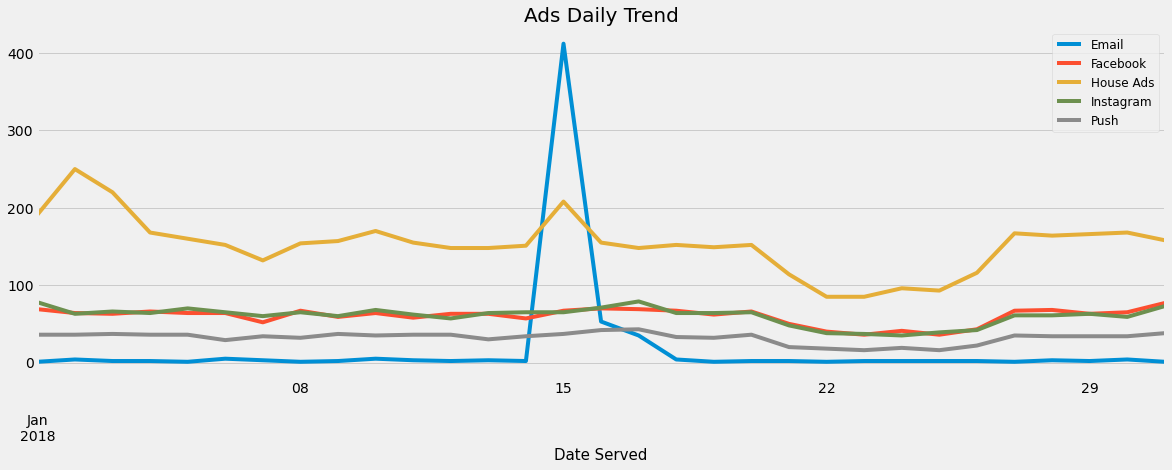

In [ ]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15)
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);


# açıklama
-Ayın 15'inde bir E-posta Patlaması oldu ve aksi halde ihmal edilebilir düzeydeydi

-Kurum reklamları yığının büyük kısmını oluşturuyor ancak dalgalanıyor

-Facebook, Insta ve Push reklamları ay boyunca sabit kaldı



In [ ]:
conversions=df.groupby('marketing_channel')['converted'].sum()
ads=df.groupby('marketing_channel')['converted'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193.0,565
Facebook,237.0,1860
House Ads,298.0,4733
Instagram,265.0,1871
Push,83.0,993


In [ ]:
conversion_df.columns=['conversions','ads_served']

In [ ]:
conversion_df['conversion_rate']=conversion_df['conversions']/conversion_df['ads_served']
conversion_df

,conversions,ads_served,conversion_rate
marketing_channel,,,
Email,193.0,565,0.341593
Facebook,237.0,1860,0.127419
House Ads,298.0,4733,0.062962
Instagram,265.0,1871,0.141635
Push,83.0,993,0.083585


# acıklama
Genel e-postanın dönüşüm oranı yüksektir ve grubun en yüksek olduğu kurum reklamları en az dönüşüm oranına sahiptir,
bu nedenle düşük dönüşüm sağlayan bir kanala yönelik reklam tahsisinin neden en yüksek olduğu kontrol edilmelidir.

# Dividing into Control & Experimemt Groups


In [ ]:
conversions=df.groupby(['variant','marketing_channel'])['converted'].sum()
ads=df.groupby(['variant','marketing_channel'])['converted'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

converted  converted
variant         marketing_channel                      
control         Email                   80.0        274
                Facebook                52.0        894
                House Ads              172.0       2552
                Instagram               52.0        888
                Push                    15.0        468
personalization Email                  113.0        291
                Facebook               185.0        966
                House Ads              126.0       2181
                Instagram              213.0        983
                Push                    68.0        525

In [ ]:
conversion_df.columns=['conversions','ads_served']
conversion_df['conversion_rate']=round(conversion_df['conversions']/conversion_df['ads_served'],2)
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [ ]:
print(conversion_df['conversions'].sum(level=0))
print(conversion_df['ads_served'].sum(level=0))

variant
control            371.0
personalization    705.0
Name: conversions, dtype: float64
variant
control            5076
personalization    4946
Name: ads_served, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_10136\3368053475.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['conversions'].sum(level=0))
C:\Users\Hp\AppData\Local\Temp\ipykernel_10136\3368053475.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['ads_served'].sum(level=0))


# açıklama
Kişiselleştirme grubunun, aynı sayıda reklam için kontrol grubuna kıyasla çok yüksek dönüşümleri var, Aşağıdaki reklamların 
kanala göre dağılımı, her iki grubun da kanal başına aşağı yukarı aynı sayıda reklama sahip olduğunu gösteriyor

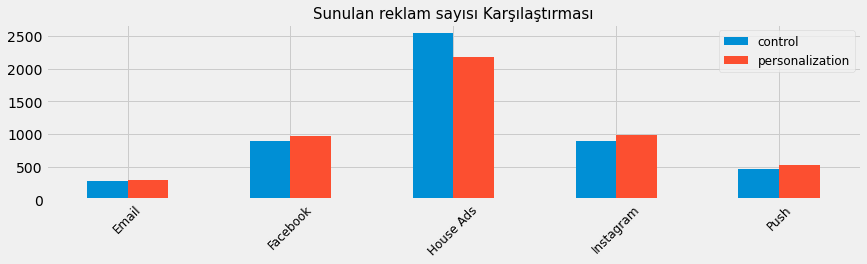

In [ ]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar',y='ads_served',figsize=(13,3))
plt.title("Sunulan reklam sayısı Karşılaştırması",size=15)
plt.xlabel("")
plt.xticks(rotation=45,size=12)
plt.legend(loc='upper right',fontsize=12);

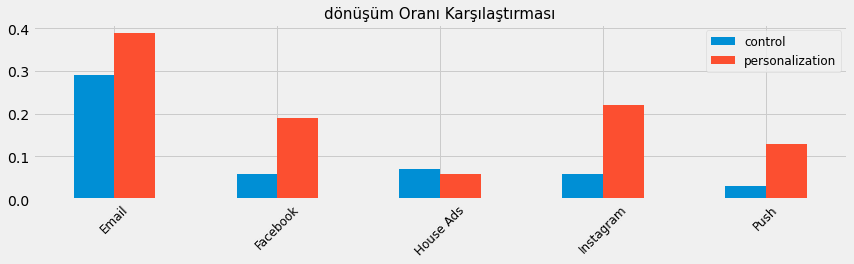

In [ ]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar',y='conversion_rate',figsize=(13,3))

plt.title("dönüşüm Oranı Karşılaştırması",size=15)
plt.xlabel("")
plt.xticks(rotation=45,size=12)
plt.legend(loc='upper right',fontsize=12);

# Retention Rate


In [ ]:
converted_df=df[df['converted']==1]

In [ ]:
total_subs=converted_df['user_id'].nunique()
retained_subs=converted_df.loc[converted_df['is_retained']==1]['user_id'].nunique()
print("Retention Rate:{}%".format(100*round(retained_subs/total_subs,1)))

Retention Rate:60.0%


# Conversions Analysis by Age Group


In [ ]:
age_df=df.pivot_table(values='user_id',index=['marketing_channel','converted'],columns='age_group',aggfunc=len)
age_df

age_group                    0-18   19-24   24-30   30-36   36-45   45-55   \
marketing_channel converted                                                  
Email             0.0           54      59      68      47      51      50   
                  1.0           39      52      52      13      12      15   
Facebook          0.0          215     269     247     228     213     290   
                  1.0           49      78      49      21      13       9   
House Ads         0.0          636     703     623     668     558     647   
                  1.0           58      58      58      31      31      31   
Instagram         0.0          261     214     230     246     261     207   
                  1.0           39     101      56      13      19      20   
Push              0.0          170     120     160      82     190      77   
                  1.0           16      25      23       4       3       5   

age_group                    55+   
marketing_channel converted        
Email             0.0          43  
                  1.0          10  
Facebook          0.0         161  
                  1.0          18  
House Ads         0.0         600  
                  1.0          31  
Instagram         0.0         187  
                  1.0          17  
Push              0.0         111  
                  1.0           7

# Conversion Function


In [ ]:
def conversion_rate(df,column_names):
    #total number of converted users
    column_conv=df[df['converted']==1].groupby(column_names)['user_id'].nunique()
    #total number users
    column_total=df.groupby(column_names)['user_id'].nunique()
    #conversion rate
    conversion_rate=round(column_conv/column_total,2)
    #fill missing values with 0
    conversion_rate=conversion_rate.fillna(0)
    return conversion_rate

In [ ]:
age_group_conrate=conversion_rate(df,["marketing_channel","age_group"])
age_group_conrate

marketing_channel  age_group
Email              0-18         0.41
                   19-24        0.46
                   24-30        0.45
                   30-36        0.22
                   36-45        0.19
                   45-55        0.22
                   55+          0.19
Facebook           0-18         0.17
                   19-24        0.23
                   24-30        0.17
                   30-36        0.07
                   36-45        0.06
                   45-55        0.03
                   55+          0.09
House Ads          0-18         0.10
                   19-24        0.09
                   24-30        0.10
                   30-36        0.05
                   36-45        0.06
                   45-55        0.05
                   55+          0.06
Instagram          0-18         0.13
                   19-24        0.31
                   24-30        0.19
                   30-36        0.05
                   36-45        0.06
         

In [ ]:
age_group_conv_df=pd.DataFrame(age_group_conrate.unstack(level=0))
age_group_conv_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


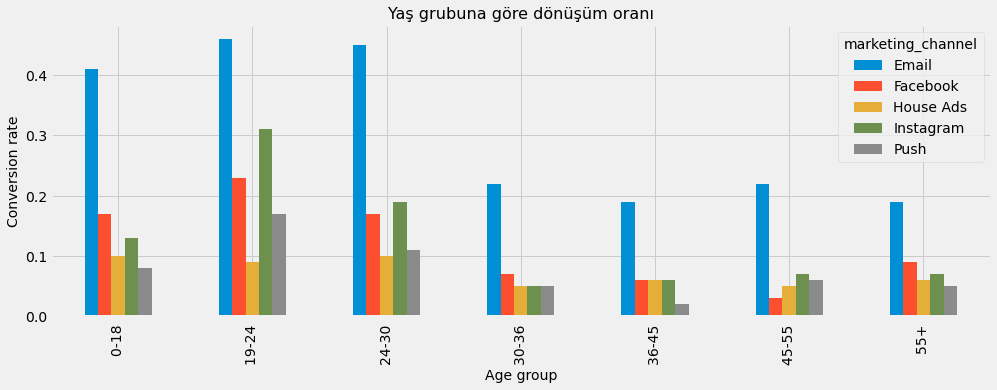

In [ ]:
plt.style.use('fivethirtyeight')
age_group_conv_df.plot(kind='bar',figsize=(15,5))


plt.title('Yaş grubuna göre dönüşüm oranı', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14);

# açıklama
-24-30 yaş arası genç yaş grupları, 30-36 yaş ve üzeri gruplara kıyasla tüm kanallarda yüksek dönüşüm oranlarına sahiptir

-Kurum reklamları, genç gruplar arasında bile düşük dönüşüm oranlarına sahip

# Conversions Analysis by Channel


In [ ]:
channel_convr_df=pd.DataFrame(conversion_rate(df,['date_served','marketing_channel']).unstack(level=1))
channel_convr_df.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


In [ ]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        
        plt.title(column+'conversion rate',size=16)
        plt.ylabel('Conversion rate',size=14)
        plt.grid(False)
        plt.show()
        plt.clf()

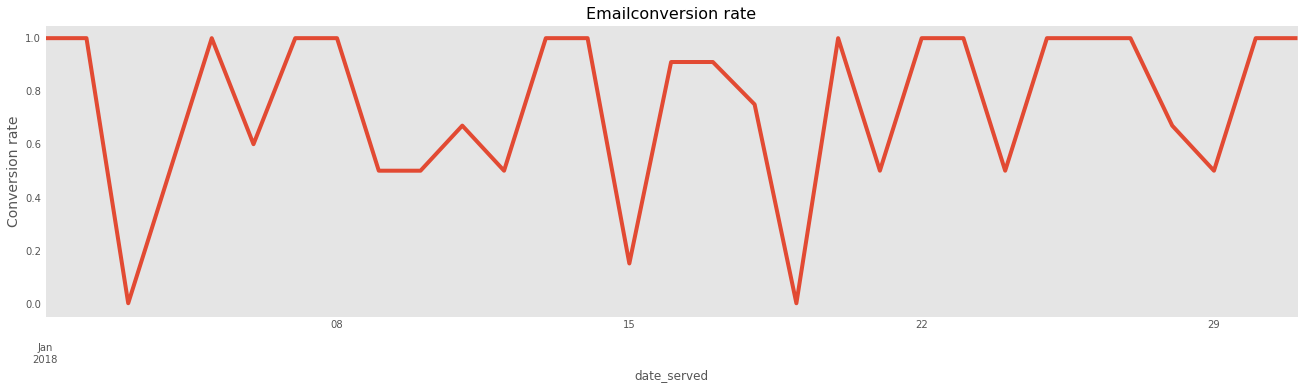

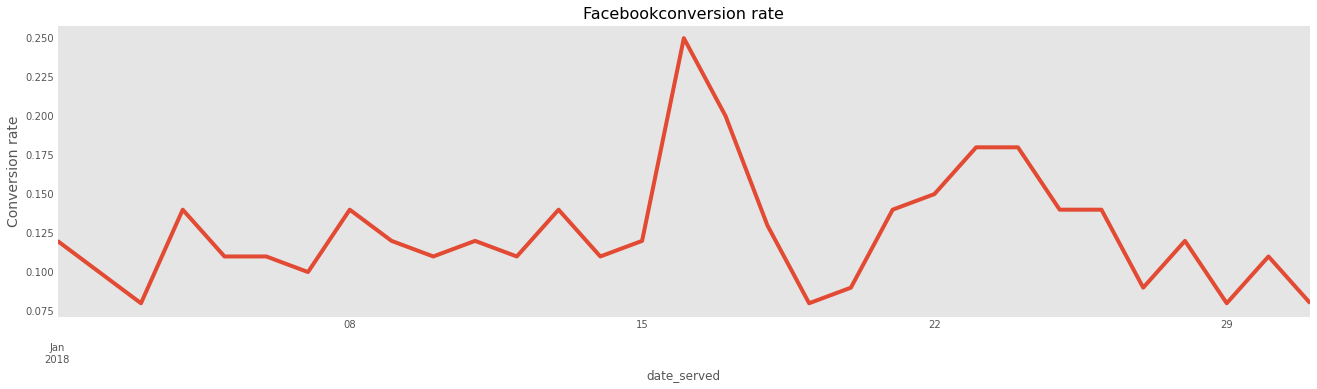

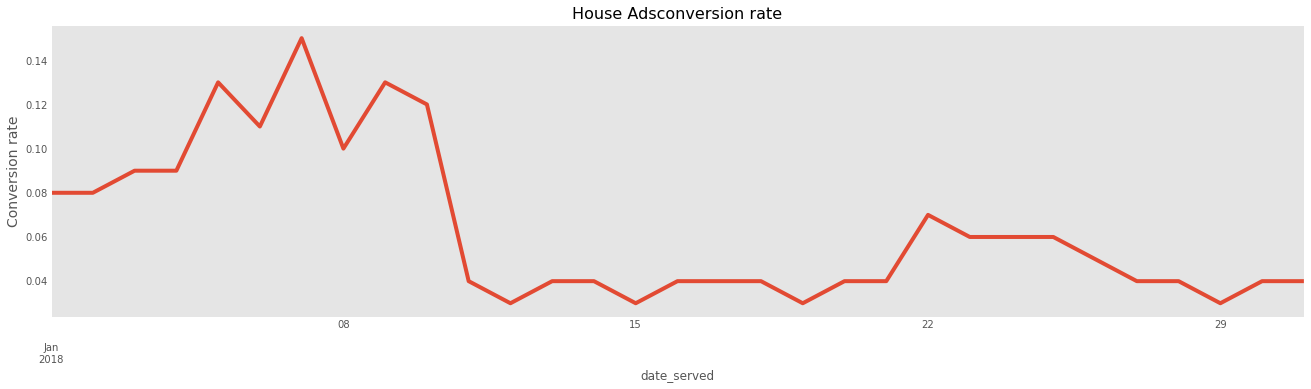

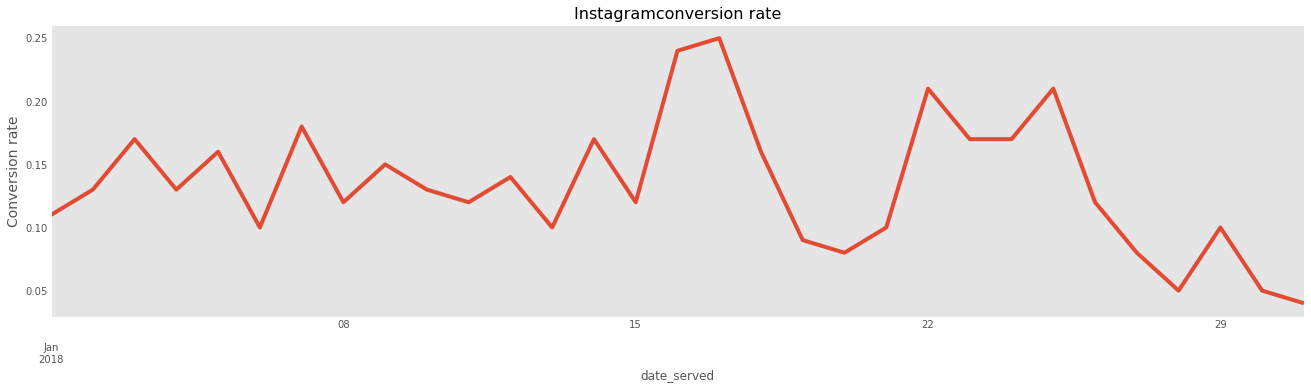

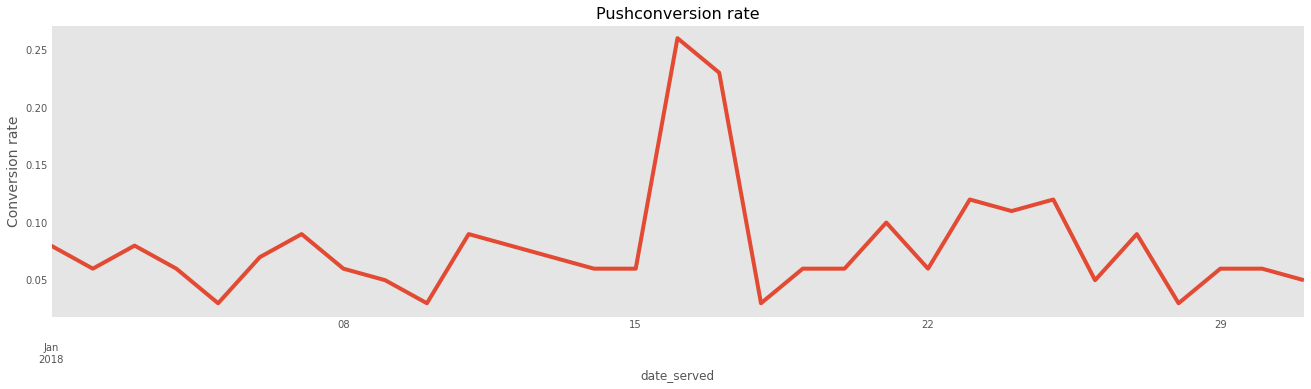

<Figure size 432x288 with 0 Axes>

In [ ]:
plotting_conv(channel_convr_df,"line")

# Açıklama
-Kurum reklamları dışındaki tüm kanalların dönüşüm oranlarında günlük yüksek dalgalanmalar vardır

-10undan sonra kurum reklamı dönüşümleri büyük ölçüde düştü, araştırılması gerekiyor

# Plotting Conversion rates by Age


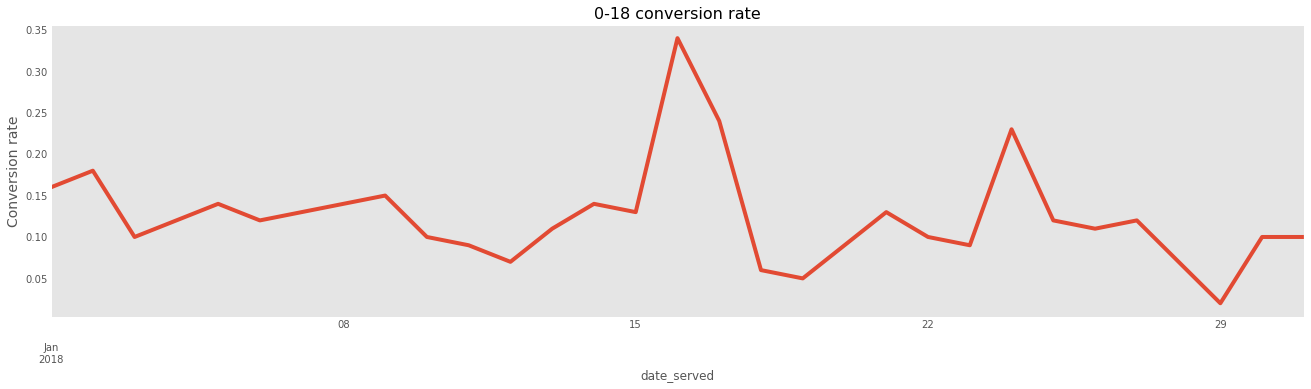

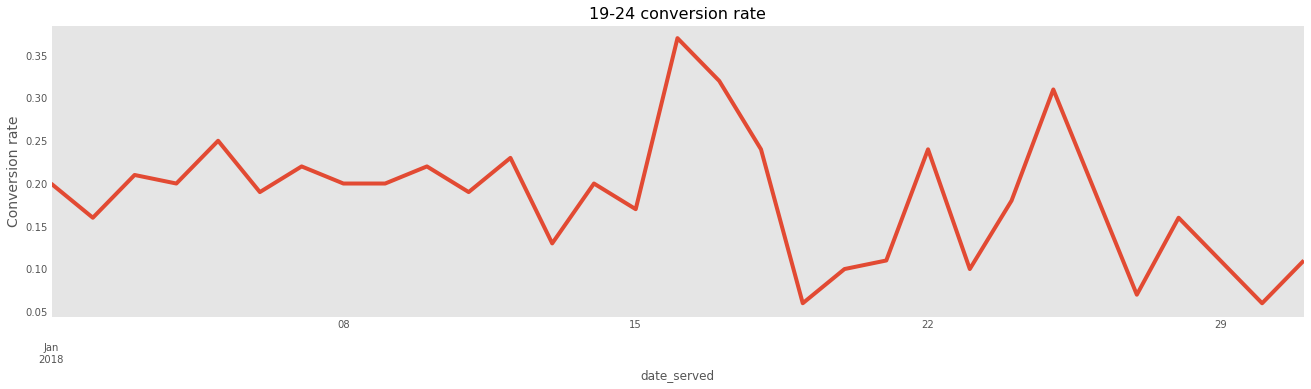

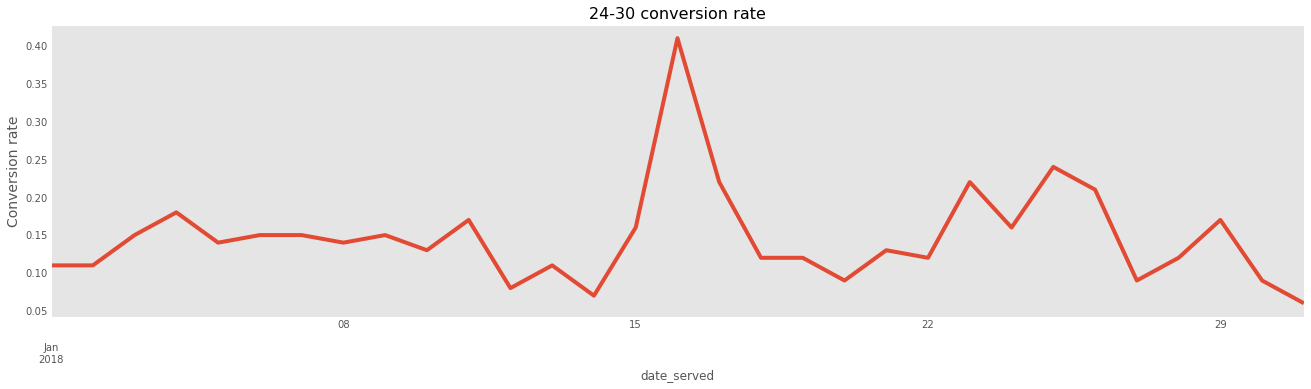

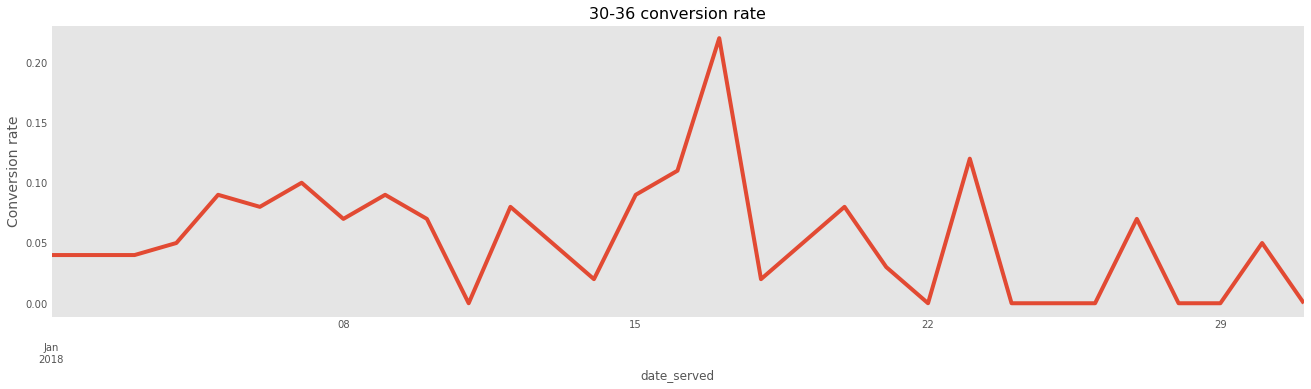

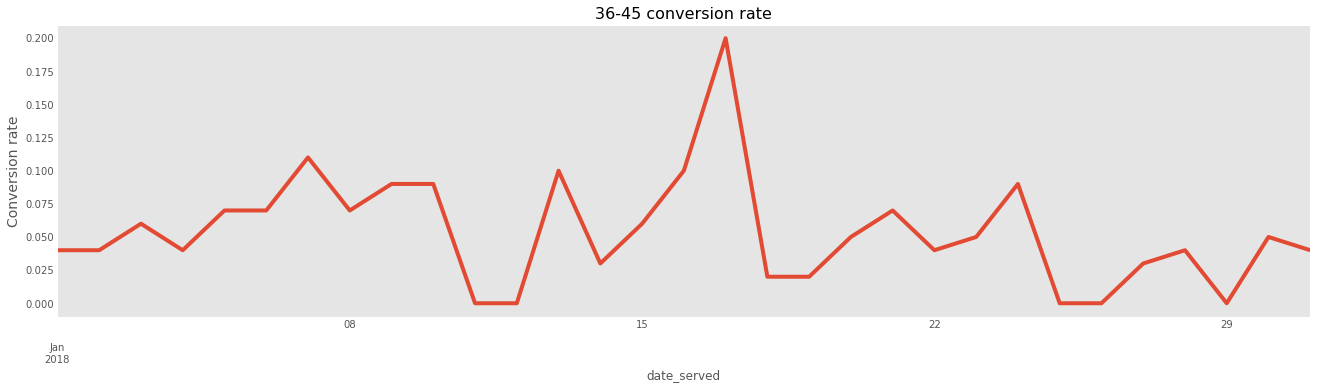

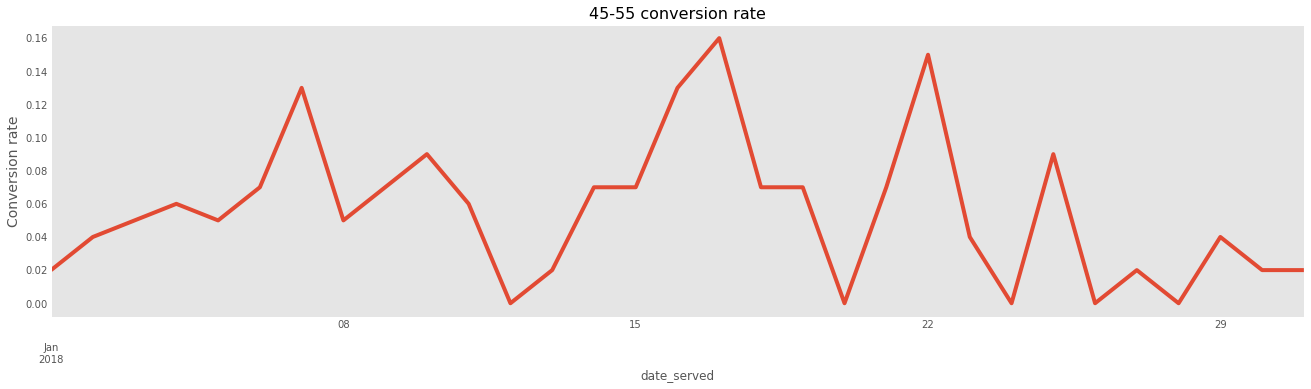

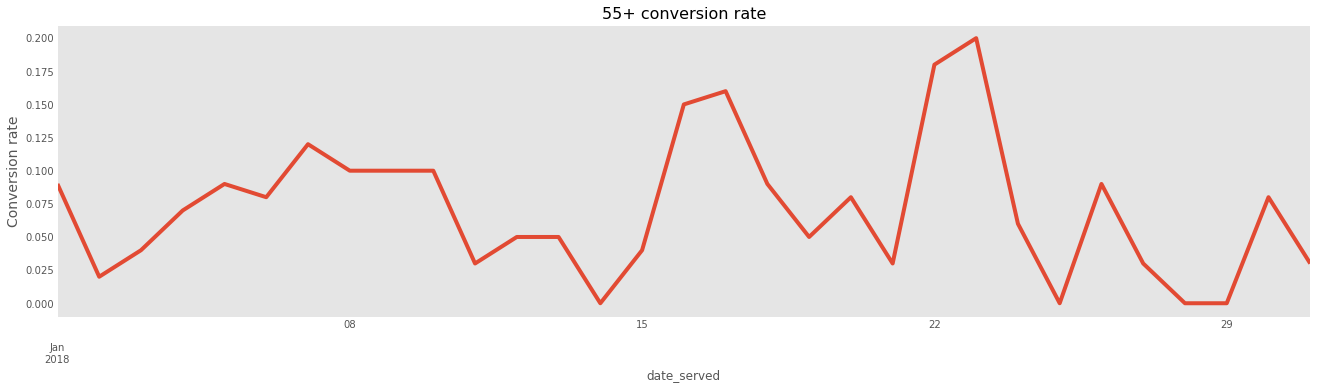

<Figure size 432x288 with 0 Axes>

In [ ]:
age_group_conv_df=pd.DataFrame(conversion_rate(df,['date_served','age_group']).unstack(level=1))
plotting_conv(age_group_conv_df,"line")

# açıklama
-Her yaş grubunda, 16. yaş civarında dönüşümde ani artış var

-Bu, FB, Insta ve Push Ads tarafından yönlendiriliyor, çünkü bu kanallar aynı anda yükseldi

# Day of week


In [ ]:
df['DOW_served']=df['date_served'].dt.dayofweek

In [ ]:
DOW_conversion_df=pd.DataFrame(conversion_rate(df,['DOW_served','marketing_channel']).unstack(level=1))
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
0.0,0.16,0.12,0.06,0.12,0.06
1.0,0.91,0.15,0.07,0.15,0.12
2.0,0.84,0.13,0.08,0.15,0.11
3.0,0.73,0.13,0.06,0.14,0.07
4.0,0.67,0.11,0.06,0.13,0.06
5.0,0.82,0.11,0.06,0.09,0.07
6.0,0.75,0.12,0.07,0.13,0.07


In [ ]:
map_dict = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri',5.0: 'Sat',6.0: 'Sun'}
DOW_conversion_df['day'] = DOW_conversion_df.index.map(map_dict)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push,day
DOW_served,,,,,,
0.0,0.16,0.12,0.06,0.12,0.06,Mon
1.0,0.91,0.15,0.07,0.15,0.12,Tue
2.0,0.84,0.13,0.08,0.15,0.11,Wed
3.0,0.73,0.13,0.06,0.14,0.07,Thu
4.0,0.67,0.11,0.06,0.13,0.06,Fri
5.0,0.82,0.11,0.06,0.09,0.07,Sat
6.0,0.75,0.12,0.07,0.13,0.07,Sun


In [ ]:
DOW_conversion_df.set_index(DOW_conversion_df['day'],inplace=True)


In [ ]:
DOW_conversion_df.drop(columns='day',inplace=True)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
day,,,,,
Mon,0.16,0.12,0.06,0.12,0.06
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11
Thu,0.73,0.13,0.06,0.14,0.07
Fri,0.67,0.11,0.06,0.13,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07


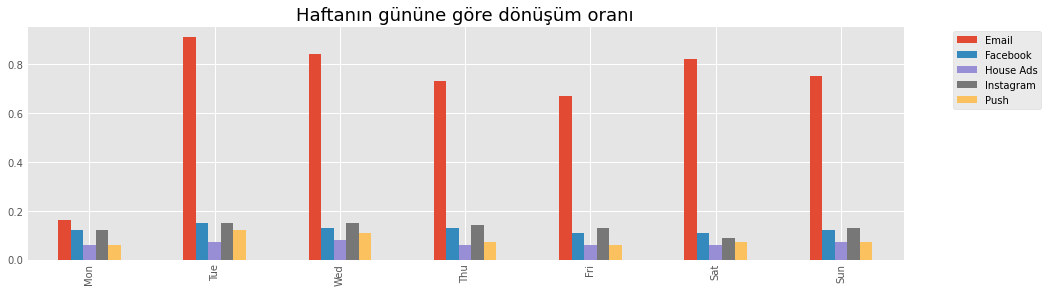

In [ ]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Haftanın gününe göre dönüşüm oranı',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

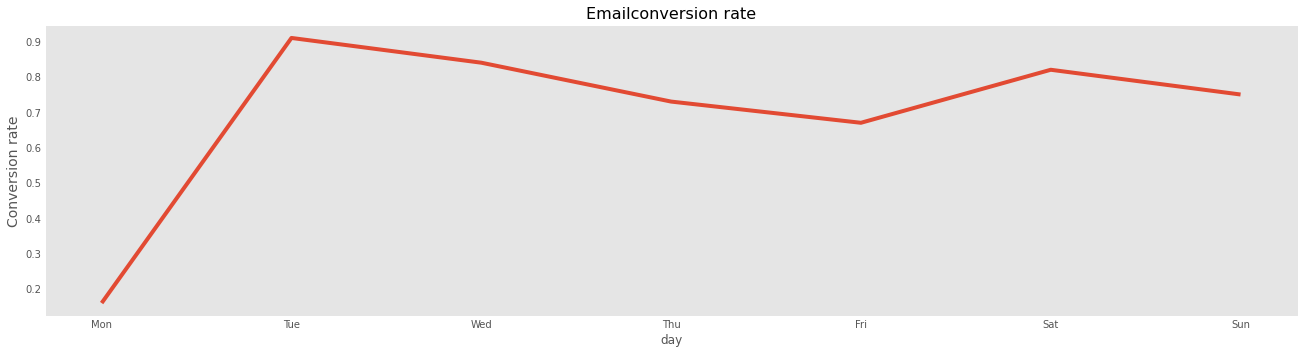

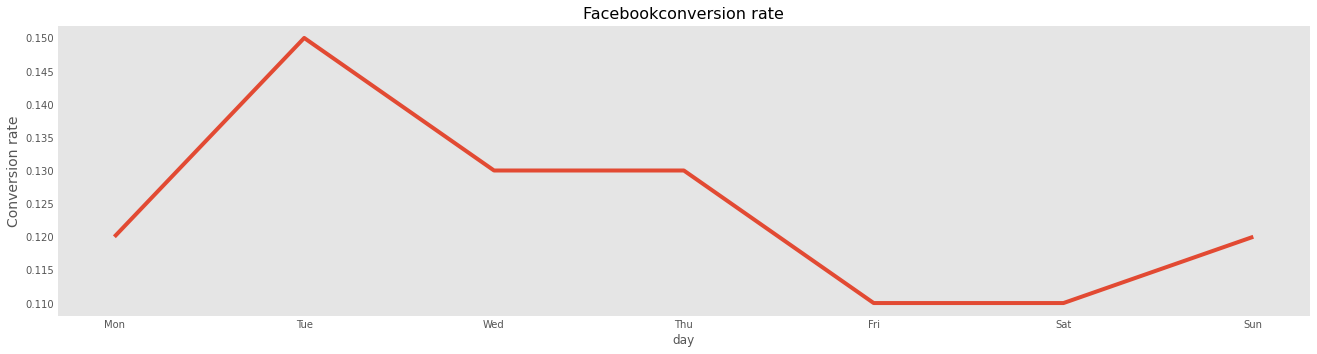

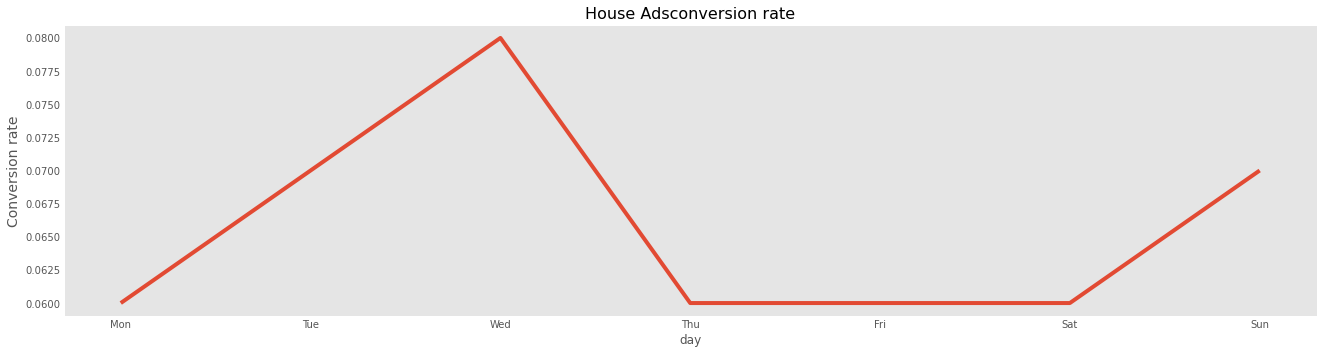

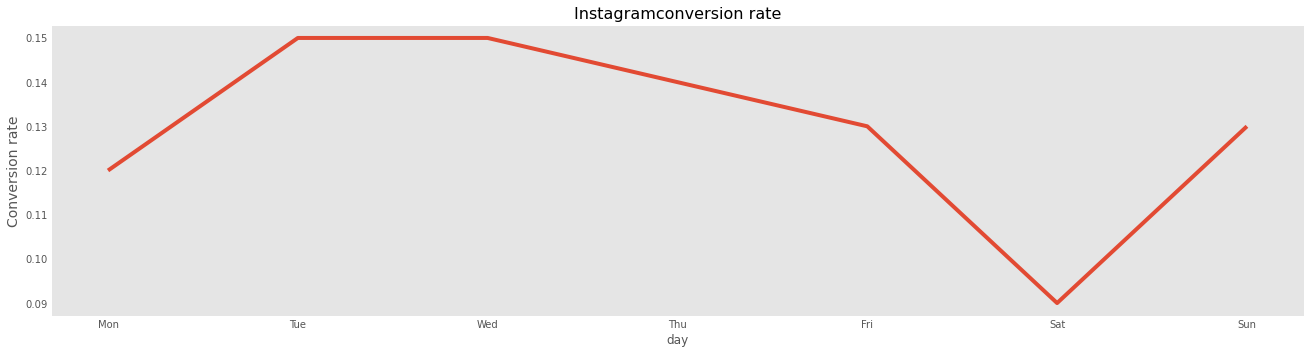

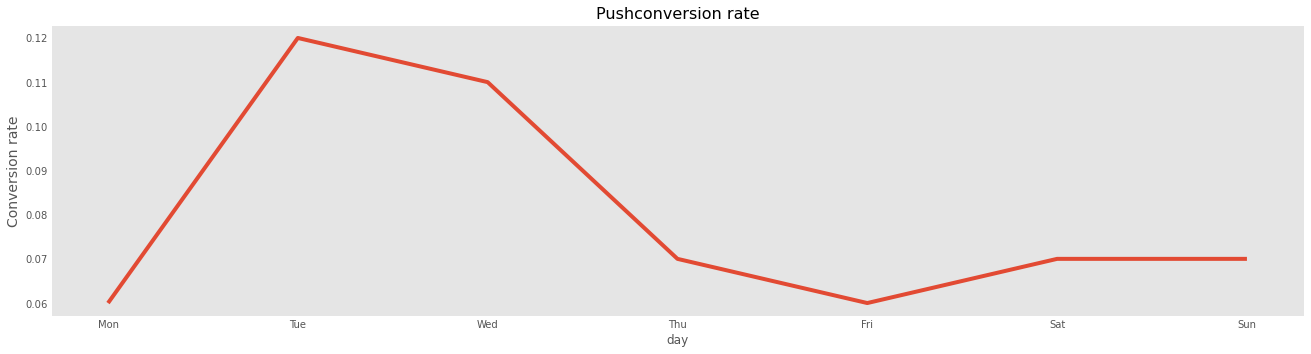

<Figure size 432x288 with 0 Axes>

In [ ]:
plotting_conv(DOW_conversion_df,"line");

# House ads conversion rate




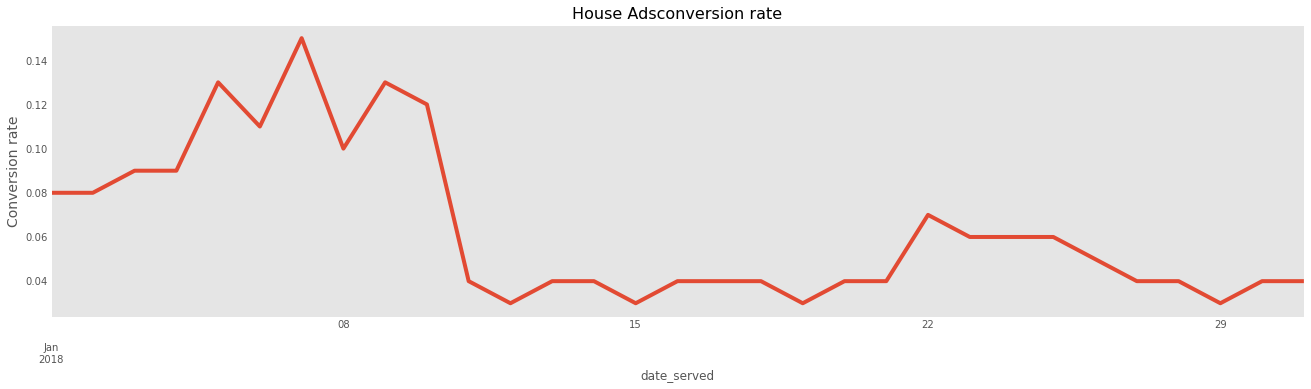

<Figure size 432x288 with 0 Axes>

In [ ]:
plotting_conv(pd.DataFrame(channel_convr_df['House Ads']),"line")


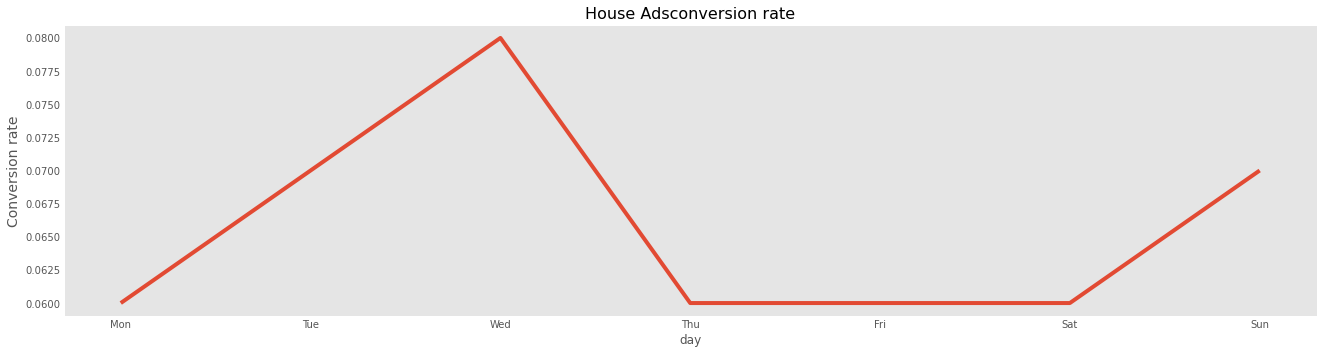

<Figure size 432x288 with 0 Axes>

In [ ]:
plotting_conv(pd.DataFrame(DOW_conversion_df['House Ads']),"line")

# Analysing House ads conversion rate

Kurum reklamları dönüşümü 11 Ocaktan beri düşüyor, düşüşün olası nedenlerini belirlemeye çalışalım.

Dalgalanmaların, teknik uygulama veya pazarlama stratejisindeki bir soruna karşı kullanıcı davranışındaki değişikliklerden
(yani haftanın gününe veya ayın saatine göre farklılıklardan) kaynaklanıp kaynaklanmadığını belirlemek hayati önem taşır.


In [ ]:
conversion_df


conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [ ]:
idx=pd.IndexSlice
conversion_df.loc[idx[:,'House Ads'],:]

,,conversions,ads_served,conversion_rate
variant,marketing_channel,,,
control,House Ads,172.0,2552,0.07
personalization,House Ads,126.0,2181,0.06


# Weekday vs Weekend House Ads Conversion



In [ ]:
house_ads_df = pd.DataFrame(channel_convr_df["House Ads"])
house_ads_df.reset_index(inplace=True)
house_ads_df['DOW']=house_ads_df['date_served'].dt.dayofweek
house_ads_df.head()

,date_served,House Ads,DOW
0,2018-01-01,0.08,0
1,2018-01-02,0.08,1
2,2018-01-03,0.09,2
3,2018-01-04,0.09,3
4,2018-01-05,0.13,4


In [ ]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: "Weekday" if x<=4 else "Weekend")
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,0,Weekday
1,2018-01-02,0.08,1,Weekday
2,2018-01-03,0.09,2,Weekday
3,2018-01-04,0.09,3,Weekday
4,2018-01-05,0.13,4,Weekday


In [ ]:
print("Kurum Reklamları için dönüşüm oranları")
print(house_ads_df.groupby("day type")["House Ads"].mean())

Conversion rates for House Ads
day type
Weekday    0.064348
Weekend    0.062500
Name: House Ads, dtype: float64
